In [1]:
import numpy as np
import os
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from  matplotlib import pyplot as plt

# Define a class to process the image

In [2]:
class ImgGen():
    def __init__(self, path, maxdimension):
        self.directory = path
        self.maxdimension = maxdimension
        
        self.imgpaths=[]
        self.imglabels =[]
        
        for file in os.listdir(self.directory):
            if file.lower().endswith('.jpg'):
                self.imgpaths += [os.path.join(self.directory, file)]
                self.imglabels +=[file.split('_')[0]]
        self.imgpaths = np.array(self.imgpaths)    #convert to np.array for the model
        self.imglabels = np.array(self.imglabels)
        
    def loadimg(self, imagepath):
        img = load_img(imagepath, color_mode='rgba', target_size=(self.maxdimension, self.maxdimension), interpolation='nearest')
        img = img_to_array(img)
        
        return img
    
    def getimgarray(self):
        imgs =[]
        for i in self.imgpaths:
            imgs.append(self.loadimg(i))
        imgarr = np.array(imgs)
        return imgarr
    
    def getdata(self):
        lblecd = LabelEncoder()
        lblecd.fit(self.imglabels)
        self.classes = len(lblecd.classes_)
        _y_data = lblecd.transform(self.imglabels)
        y_data = tf.keras.utils.to_categorical(_y_data, self.classes)
                
        x_data = self.getimgarray()
        x_data /= 255.
        
        return (x_data, y_data)

# Define method to plot the graphs

In [3]:
def plot_training_results(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Define method for the model

In [4]:
def runcnn(x_train, y_train, x_test, y_test, dropratio, epchs=10):
    
    #data augmentation to add more samples by rotating the the images
    data_augmentation = keras.Sequential(
      [
        layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                     input_shape=x_train.shape[1:]),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
      ]
    )
    
    model = tf.keras.Sequential([data_augmentation])
    model.add(tf.keras.layers.Conv2D(32, (3,3),  padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Conv2D(32, (3,3),  padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(dropratio))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense((y_train.shape[-1]), activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics='accuracy')
    model.summary

    history = model.fit(x_train, y_train, batch_size=batchsize, verbose =1, epochs=epchs, validation_data=(x_test, y_test))

    loss, accuracy = model.evaluate(x=x_test, y=y_test)
    print('loss =', loss, ', accuracy =', accuracy)
    
    plot_training_results(history, epchs)
     

# Running the model

In [5]:
#variables
testfolder = 'test'
trainfolder= 'train' 
batchsize = 8
maxdim = 32 #max dimension for picture, W or H, maxdimension X maxdimension

traindata = ImgGen(trainfolder, maxdim)
testdata = ImgGen(testfolder, maxdim)
(x_train, y_train) = traindata.getdata()
(x_test, y_test) = testdata.getdata()


Epoch 1/15
30/30 [==============================] - 2s 25ms/step - loss: 1.3395 - accuracy: 0.3167 - val_loss: 1.2616 - val_accuracy: 0.3000
Epoch 2/15
30/30 [==============================] - 0s 14ms/step - loss: 1.1880 - accuracy: 0.5042 - val_loss: 1.0974 - val_accuracy: 0.4667
Epoch 3/15
30/30 [==============================] - 0s 13ms/step - loss: 0.9193 - accuracy: 0.5875 - val_loss: 0.8567 - val_accuracy: 0.7167
Epoch 4/15
30/30 [==============================] - 0s 14ms/step - loss: 0.7003 - accuracy: 0.7625 - val_loss: 0.5905 - val_accuracy: 0.8500
Epoch 5/15
30/30 [==============================] - 0s 14ms/step - loss: 0.5866 - accuracy: 0.7958 - val_loss: 0.5691 - val_accuracy: 0.8333
Epoch 6/15
30/30 [==============================] - 0s 14ms/step - loss: 0.4541 - accuracy: 0.8542 - val_loss: 0.3620 - val_accuracy: 0.9000
Epoch 7/15
30/30 [==============================] - 0s 13ms/step - loss: 0.3932 - accuracy: 0.8583 - val_loss: 0.5273 - val_accuracy: 0.8333
Epoch 8/15
30

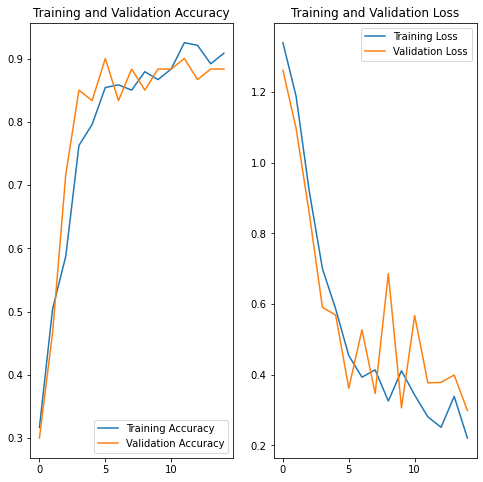

In [6]:
runcnn(x_train, y_train, x_test, y_test, dropratio=0.2, epchs=15)